In [1]:
%matplotlib inline


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
#NEWCOMMENTS
#Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


In [4]:
# Files to load
overall_homeless_data_to_load = "Resources/MD_County_Homeless.csv"
homeless_by_county__data_to_load = "Resources/MD_Homeless_PerCounty.csv"

In [5]:
# Read School and Student Data Files and store into Pandas DataFrames
overall_homeless_data = pd.read_csv(overall_homeless_data_to_load) 
homeless_by_county_data = pd.read_csv(homeless_by_county__data_to_load)


In [6]:
# Combine overall homeless and homeless by county data into a single dataset.  
homeless_data_complete = pd.merge(overall_homeless_data, homeless_by_county_data, how="left", on=["County_ID", "County_ID"])

homeless_data_complete

,County_ID,County_name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Med_HH_Income_Percent_of_State_Total,Overall Homeless 2019,Overall Homeless 2018,...,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Non-Hispanic,Overall Homeless - Hispanic/Latino,Overall Homeless - White,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,MD-500,Allegany County,"32,253","30,618","1,635",5.1,"48,170",55.6,145,79,...,98,47,145,0,119,14,0,0,0,12
1,MD-501,Baltimore city,"287,760","273,351","14,409",5.0,"49,780",57.5,"2,294","2,508",...,631,"1,660","2,234",60,602,"1,609",15,25,8,35
2,MD-502,Harford County,"143,572","138,927","4,645",3.2,"91,492",105.6,228,190,...,100,127,204,24,116,83,1,2,0,26
3,MD-503,Anne Arundel County,"321,069","311,556","9,513",3.0,"100,916",116.5,302,366,...,112,189,296,6,164,118,1,1,0,18
4,MD-504,Howard County,"191,529","186,427","5,102",2.7,"121,329",140.0,201,168,...,93,107,192,9,45,132,2,5,1,16
5,MD-505,Baltimore County,"459,091","442,597","16,494",3.6,"76,972",88.8,735,758,...,344,391,723,12,253,439,3,4,1,35
6,MD-506,Carroll County,"96,933","94,187","2,746",2.8,"101,810",117.5,144,173,...,57,84,141,3,111,15,0,2,0,16
7,MD-507,Cecil County,"53,891","51,812","2,079",3.9,"75,307",86.9,126,129,...,34,92,119,7,91,30,0,0,0,5
8,MD-508,"Charles, Calvert, St.Mary's Counties","65,682","63,492","2,190",3.0,"100,896",116.0,306,492,...,125,170,304,2,114,175,1,2,1,13
9,MD-509,Frederick County,"137,920","133,683","4,237",3.1,"102,951",118.8,286,316,...,82,204,272,14,183,81,2,0,0,20


In [7]:
#homeless_data_complete.columns

In [8]:
homeless_col=['Civilian_labor_force', 'Employed',
       'Unemployed', 'Unemployment_rate', 'Median_Household_Income',
       'Med_HH_Income_Percent_of_State_Total', 'Overall Homeless 2019',
       'Overall Homeless 2018', 'Overall Homeless 2017',
       'Overall Homeless 2016', 'Overall Homeless 2015',
       'Overall Homeless - Under 18 ', 'Overall Homeless - Age 18 to 24',
       'Overall Homeless - Over 24', 'Overall Homeless - Female',
       'Overall Homeless - Male', 'Overall Homeless - Non-Hispanic',
       'Overall Homeless - Hispanic/Latino', 'Overall Homeless - White',
       'Overall Homeless - Black or African American',
       'Overall Homeless - Asian',
       'Overall Homeless - American Indian or Alaska Native',
       'Overall Homeless - Native Hawaiian or Other Pacific Islander',
       'Overall Homeless - Multiple Races']

In [9]:
for i in homeless_col:
    try:
        #print(i)
        #print(homeless_data_complete[i])
        homeless_data_complete[i]= homeless_data_complete[i].str.replace(',', '').astype(float)
    
    except:
        #print("Error")
        pass
    

In [10]:
homeless_data_complete.head()

,County_ID,County_name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Med_HH_Income_Percent_of_State_Total,Overall Homeless 2019,Overall Homeless 2018,...,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Non-Hispanic,Overall Homeless - Hispanic/Latino,Overall Homeless - White,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,MD-500,Allegany County,32253.0,30618.0,1635.0,5.1,48170.0,55.6,145.0,79.0,...,98,47.0,145.0,0,119,14.0,0,0,0,12
1,MD-501,Baltimore city,287760.0,273351.0,14409.0,5.0,49780.0,57.5,2294.0,2508.0,...,631,1660.0,2234.0,60,602,1609.0,15,25,8,35
2,MD-502,Harford County,143572.0,138927.0,4645.0,3.2,91492.0,105.6,228.0,190.0,...,100,127.0,204.0,24,116,83.0,1,2,0,26
3,MD-503,Anne Arundel County,321069.0,311556.0,9513.0,3.0,100916.0,116.5,302.0,366.0,...,112,189.0,296.0,6,164,118.0,1,1,0,18
4,MD-504,Howard County,191529.0,186427.0,5102.0,2.7,121329.0,140.0,201.0,168.0,...,93,107.0,192.0,9,45,132.0,2,5,1,16


In [11]:
df1 = homeless_data_complete[["County_name","Overall Homeless - White","Overall Homeless - Black or African American","Overall Homeless - Asian","Overall Homeless - American Indian or Alaska Native","Overall Homeless - Native Hawaiian or Other Pacific Islander","Overall Homeless - Multiple Races"]]

In [12]:
df1.head()

,County_name,Overall Homeless - White,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,Allegany County,119,14.0,0,0,0,12
1,Baltimore city,602,1609.0,15,25,8,35
2,Harford County,116,83.0,1,2,0,26
3,Anne Arundel County,164,118.0,1,1,0,18
4,Howard County,45,132.0,2,5,1,16


Text(0, 0.5, '# of Homeless')

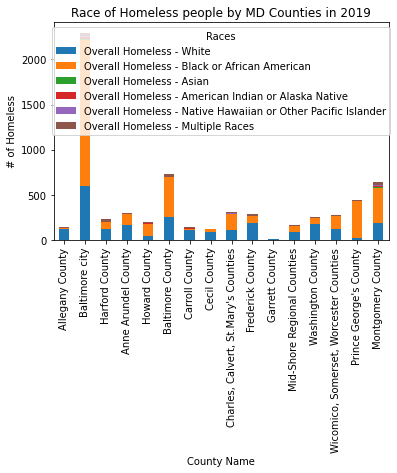

In [13]:
# plot data in stack manner of bar type
df1.plot(x='County_name', kind='bar', stacked=True,
        title='Race of Homeless people by MD Counties in 2019').legend(loc='upper center', title="Races")
plt.xlabel("County Name")
plt.ylabel("# of Homeless")
#plt.savefig("Resources/Race of Homeless people by MD Counties in 2019.png")

In [14]:
labels = "White", "Asian", "Black or African American",  "Native Hawaiian or Other Pacific Islander",   "Multiple Race", "American Indian or Alaska Native",
colors = ["red", "blue", "lightgreen", "pink", "purple","orange"]


In [15]:
#BlackN = int(homeless_data_complete["Overall Homeless - Black or African American"])

White = homeless_data_complete["Overall Homeless - White"].sum()
Black = homeless_data_complete["Overall Homeless - Black or African American"].sum()
Asian = homeless_data_complete["Overall Homeless - Asian"].sum()
AmerInd = homeless_data_complete["Overall Homeless - American Indian or Alaska Native"].sum()
NatHaw = homeless_data_complete["Overall Homeless - Native Hawaiian or Other Pacific Islander"].sum()
MultiRace = homeless_data_complete["Overall Homeless - Multiple Races"].sum()



In [16]:
homelessMD = [White, Asian, Black, NatHaw, MultiRace, AmerInd]

<Figure size 1080x216 with 0 Axes>

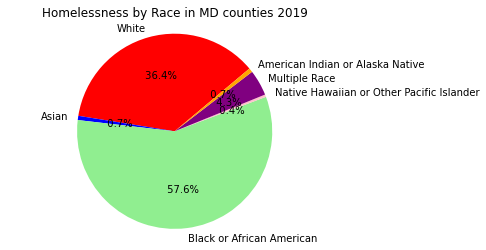

In [110]:

plt.figure(figsize = (15,3))
fig1, ax1 = plt.subplots()

ax1.pie(homelessMD, labels=labels, colors=colors, radius=20, autopct='%5.1f%%', startangle=40, shadow=False)

ax1.axis('equal')
plt.title("Homelessness by Race in MD counties 2019")
#plt.savefig("Resources/Homeless by MD counties - pie.png")
plt.show()

<AxesSubplot:title={'center':'Stacked Bar Graph'}, ylabel='County_name'>

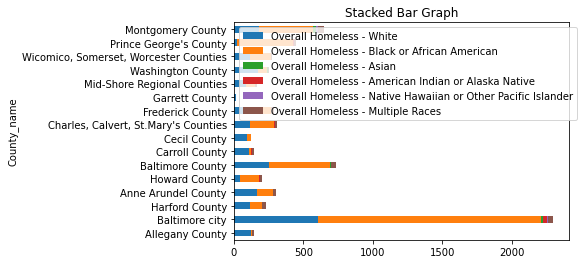

In [18]:
#new Stacked bar
# plot a Stacked Bar Chart using matplotlib
df1.plot(
    x = 'County_name',
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

In [23]:


df_total = df1["Overall Homeless - White"] + df1["Overall Homeless - Black or African American"] + df1["Overall Homeless - Asian"]+df1["Overall Homeless - American Indian or Alaska Native"] + df1["Overall Homeless - Native Hawaiian or Other Pacific Islander"] + df1["Overall Homeless - Multiple Races"]
print (df_total)
df_rel = df1[df1.columns[1:]].div(df_total, 0)*100
print(df_rel)

#for n in df_rel:
#    for i, (cs, ab, pc) in enumerate(zip(df1.iloc[:, 1:].cumsum(1)[n], 
#                                         df1[n], df_rel[n])):
#        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
#                 va = 'center', ha = 'center')
        


0      145.0
1     2294.0
2      228.0
3      302.0
4      201.0
5      735.0
6      144.0
7      126.0
8      306.0
9      286.0
10      12.0
11     164.0
12     249.0
13     275.0
14     447.0
15     647.0
dtype: float64
    Overall Homeless - White  Overall Homeless - Black or African American  \
0                  82.068966                                      9.655172   
1                  26.242371                                     70.139494   
2                  50.877193                                     36.403509   
3                  54.304636                                     39.072848   
4                  22.388060                                     65.671642   
5                  34.421769                                     59.727891   
6                  77.083333                                     10.416667   
7                  72.222222                                     23.809524   
8                  37.254902                                     57.189542 

[27 69 44 69]
<class 'numpy.ndarray'>


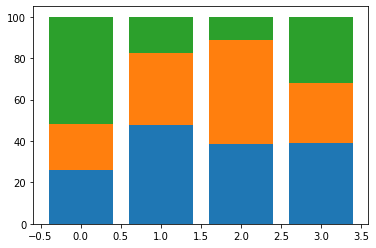

In [58]:
A = np.array([7, 33, 17, 27])
B = np.array([6, 24, 22, 20])
C = np.array([14, 12, 5, 22])
Total = A + B + C
print (Total)

norm_A = A / Total * 100
norm_B = B / Total * 100
norm_C = C / Total * 100


print(type(norm_A))
Pos = range(4)
plt.bar(Pos, norm_A)
plt.bar(Pos, norm_B, bottom = norm_A)
plt.bar(Pos, norm_C, bottom = norm_A + norm_B)
plt.show() 

0      145.0
1     2294.0
2      228.0
3      302.0
4      201.0
5      735.0
6      144.0
7      126.0
8      306.0
9      286.0
10      12.0
11     164.0
12     249.0
13     275.0
14     447.0
15     647.0
dtype: float64
<class 'pandas.core.series.Series'>
[ 82.06896552  26.2423714   50.87719298  54.30463576  22.3880597
  34.42176871  77.08333333  72.22222222  37.25490196  63.98601399
 100.          50.6097561   68.6746988   42.18181818   4.92170022
  28.28438949]
<class 'numpy.ndarray'>
[0. 1. 2. 3.]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

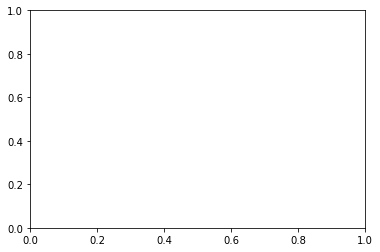

In [63]:

df_total = df1["Overall Homeless - White"] + df1["Overall Homeless - Black or African American"] + df1["Overall Homeless - Asian"]+df1["Overall Homeless - American Indian or Alaska Native"] + df1["Overall Homeless - Native Hawaiian or Other Pacific Islander"] + df1["Overall Homeless - Multiple Races"]
print (df_total)
#df_total.as_matrix(columns=None)
print (type(df_total))

#df_rel = df1[df1.columns[1:]].div(df_total, 0)*100
#print(df_rel)

#mah_np_array = df.as_matrix(columns=None)
#mah_np_array = df.values


norm_A = (df1["Overall Homeless - White"] / df_total * 100).values
norm_B = (df1["Overall Homeless - Black or African American"] / df_total * 100).values
norm_C = (df1["Overall Homeless - Asian"] / df_total * 100).values
#norm_B = df1["Overall Homeless - American Indian or Alaska Native"] / df_total * 100
#norm_B = df1["Overall Homeless - Native Hawaiian or Other Pacific Islander"] / df_total * 100
#norm_B = df1["Overall Homeless - Multiple Races"] / df_total * 100


print(norm_A)
print(type(norm_A))

Pos = np.arange(4.0)
print(Pos)

plt.bar(Pos, norm_A)
plt.bar(Pos, norm_B, bottom = norm_A)
plt.bar(Pos, norm_C, bottom = norm_A + norm_B)
plt.show() 